<a href="https://colab.research.google.com/github/sonjoy1s/project_weak_ML/blob/main/Module26_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import VotingRegressor,StackingRegressor


from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,classification_report

import warnings
warnings.filterwarnings("ignore")

In [156]:
df = pd.read_csv("/content/bangladesh_student_performance.csv")
df.head()

,date,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,29/04/2018,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,29/04/2018,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,29/04/2018,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,29/04/2018,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,29/04/2018,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94


In [157]:
#!jupyter nbconvert \
  #--ClearMetadataPreprocessor.enabled=True \
 # --inplace *.ipynb

In [158]:
len(df.columns)

16

In [159]:
len(df)

2018

In [160]:
df.drop(columns=['date'],inplace=True)

In [161]:
df.head()

,gender,age,address,famsize,Pstatus,M_Edu,F_Edu,M_Job,F_Job,relationship,smoker,tuition_fee,time_friends,ssc_result,hsc_result
0,M,18,Rural,GT3,Together,3,2,At_home,Farmer,No,No,71672,4,4.22,3.72
1,F,19,Rural,LE3,Apart,0,4,Other,Health,Yes,No,26085,5,3.47,2.62
2,F,19,Rural,GT3,Together,0,3,Teacher,Services,No,No,40891,3,3.32,2.56
3,F,19,Rural,LE3,Apart,2,3,At_home,Business,No,No,50600,2,4.57,4.17
4,M,17,Rural,GT3,Together,1,1,At_home,Farmer,No,No,62458,2,4.50,3.94


In [162]:
corr_target = df.select_dtypes(include=np.number).corr()['hsc_result'].sort_values(ascending=False)
print(corr_target)

hsc_result      1.000000
ssc_result      0.950178
M_Edu           0.063776
F_Edu           0.054811
tuition_fee     0.038068
age            -0.009857
time_friends   -0.156356
Name: hsc_result, dtype: float64


## Saperated X and y

In [163]:
X = df.drop(columns=['hsc_result'],axis=1)
y = df['hsc_result']

In [164]:
numerical_cols = X.select_dtypes(include=np.number).columns
print(numerical_cols)
categorical_cols = X.select_dtypes(exclude=np.number).columns
print(categorical_cols)

Index(['age', 'M_Edu', 'F_Edu', 'tuition_fee', 'time_friends', 'ssc_result'], dtype='object')
Index(['gender', 'address', 'famsize', 'Pstatus', 'M_Job', 'F_Job',
       'relationship', 'smoker'],
      dtype='object')


In [165]:
len(df[numerical_cols].columns)

6

In [166]:
len(df[categorical_cols].columns)

8

Numerical Pipeline

In [167]:
numerical_pipe = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='median')),
        ('scaler',StandardScaler())
    ]
)

In [168]:
categorical_pipe = Pipeline(
    steps=[
        ('imputer',SimpleImputer(strategy='most_frequent')),
        ('encoder',OneHotEncoder(handle_unknown='ignore'))
    ]
)

In [169]:
#Combine
com_preprocessor = ColumnTransformer(
    transformers=[
        ('num',numerical_pipe,numerical_cols),
        ('cat',categorical_pipe,categorical_cols)
    ]
)

In [170]:
X_train,X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2 , random_state=42)

Ensemble - boosting, stacking
### New Section

In [171]:
#base learner

reg_lr = LinearRegression()
reg_rf = RandomForestRegressor( n_estimators=100, random_state=42 )
reg_gb = GradientBoostingRegressor( n_estimators=100 , random_state=42 )
reg_xgb = XGBRegressor( n_estimators=100 , random_state=42 )
reg_lgb = LGBMRegressor( n_estimators=100 , random_state=42 )
reg_ada = AdaBoostRegressor( n_estimators=100 , random_state=42 )

In [172]:
#voting regressor

voting_reg = VotingRegressor(
    estimators=[
        ('lr',reg_lr),
        ('rf',reg_rf),
        ('gb',reg_gb),
        ('xgb',reg_xgb),
        ('lgb',reg_lgb),
        ('ada',reg_ada)
    ]
)

In [173]:
#stacking
stacking_reg = StackingRegressor(
    estimators=[
        ('lr',reg_lr),
        ('rf',reg_rf),
        ('gb',reg_gb),
        ('xgb',reg_xgb),
        ('lgb',reg_lgb),
        ('ada',reg_ada)
])

In [174]:
#model Train
model_train = {
    'Linear Regression':reg_lr,
    'Random Forest':reg_rf,
    'Gradient Boosting':reg_gb,
    'XGBoost':reg_xgb,
    'LightGBM':reg_lgb,
    'AdaBoost':reg_ada,
    'Voting Regressor':voting_reg,
    'Stacking Regressor':stacking_reg
}

In [175]:
# training to Evulation
results = []
for name, model in model_train.items():
  pipe = Pipeline(
      [
          ('preprocessor',com_preprocessor),
          ('model',model)
      ]
  )

  pipe.fit(X_train,y_train)

  y_pred = pipe.predict(X_test)

  r2 = r2_score(y_test,y_pred)
  mse = mean_squared_error(y_test,y_pred)
  mae = mean_absolute_error(y_test,y_pred)
  rmse = np.sqrt(mse)

  results.append({
      'Model Name':name,
      'R2 Score':r2,
      'MSE':mse,
      'MAE':mae,
      'RMSE':rmse
  })

result_df = pd.DataFrame(results).sort_values("R2 Score",ascending=False)

print(result_df)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000340 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 1614, number of used features: 28
[LightGBM] [Info] Start training from score 3.203556
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000204 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 1614, number of used features: 28
[LightGBM] [Info] Start training from score 3.203556
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000200 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, y

### Visulization Model

0.9595649223446001


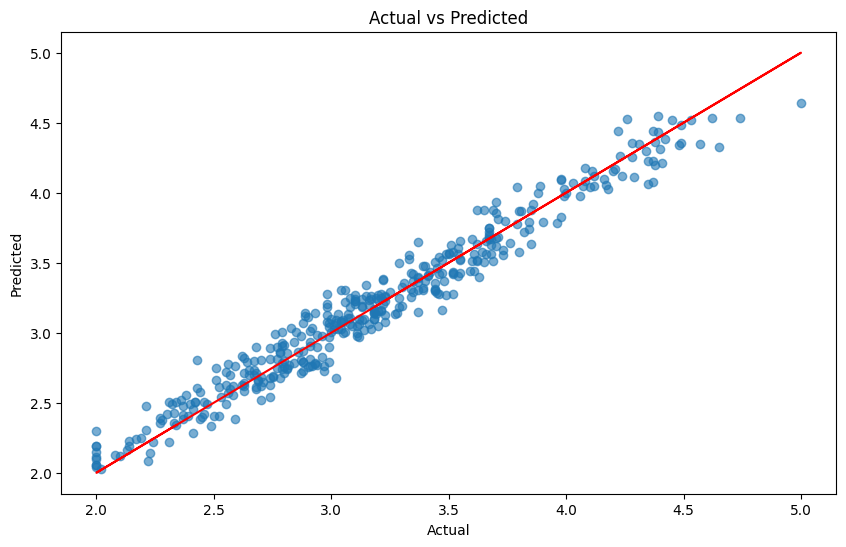

In [179]:
best_model = result_df.iloc[0]['Model Name']
best_model_obj = model_train[best_model]

final_pipe = Pipeline(
    [
        ('preprocessor',com_preprocessor),
        ('model',best_model_obj)
    ]
)

final_pipe.fit(X_train,y_train)
y_final_pred = final_pipe.predict(X_test)
print(r2_score(y_test,y_pred))


#plot part
plt.figure(figsize=(10,6))
plt.scatter(x=y_test,y=y_final_pred,alpha=0.6)
plt.plot(y_test,y_test,color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()